In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Load data
df =pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

# Map categorical values to numerical values
df["CALC"] = df["CALC"].map({"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3})
df["CAEC"] = df["CAEC"].map({"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3})
df["NObeyesdad"] = df["NObeyesdad"].map({"Insufficient_Weight": 0, "Normal_Weight": 1,
                                         "Overweight_Level_I": 2, "Overweight_Level_II": 3,
                                         "Obesity_Type_I": 4, "Obesity_Type_II": 5,
                                         "Obesity_Type_III": 6})
df.describe()

,Age,Height,Weight,CALC,FCVC,NCP,CH2O,FAF,TUE,CAEC,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,0.731407,2.419043,2.685628,2.008011,1.010298,0.657866,1.140692,3.112269
std,6.345968,0.093305,26.191172,0.515498,0.533927,0.778039,0.612953,0.850592,0.608927,0.468543,1.985062
min,14.000000,1.450000,39.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,0.000000,2.000000,2.658738,1.584812,0.124505,0.000000,1.000000,1.000000
50%,22.777890,1.700499,83.000000,1.000000,2.385502,3.000000,2.000000,1.000000,0.625350,1.000000,3.000000
75%,26.000000,1.768464,107.430682,1.000000,3.000000,3.000000,2.477420,1.666678,1.000000,1.000000,5.000000
max,61.000000,1.980000,173.000000,3.000000,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,6.000000


In [8]:
# Define the ranges
Age_range = np.linspace(14, 60, 100)
Height_range = np.linspace(1.45, 1.97, 100)
Weight_range = np.linspace(39, 173, 100)
CALC_range = np.linspace(0, 3, 100)
FCVC_range = np.linspace(1, 3, 100)
NCP_range = np.linspace(1, 4, 100)
CH2O_range = np.linspace(1, 3, 100)
FAF_range = np.linspace(0, 3, 100)
TUE_range = np.linspace(0, 2, 100)
CAEC_range = np.linspace(0, 2, 100)
NObeyesdad_range = np.linspace(0, 6, 100)

In [9]:
# Define fuzzy variables
age = ctrl.Antecedent(Age_range, 'age')
height = ctrl.Antecedent(Height_range, 'height')
weight = ctrl.Antecedent(Weight_range, 'weight')
calc = ctrl.Antecedent(CALC_range, 'calc')
fcvc = ctrl.Antecedent(FCVC_range, 'fcvc')
ncp = ctrl.Antecedent(NCP_range, 'ncp')
ch2o = ctrl.Antecedent(CH2O_range, 'ch2o')
faf = ctrl.Antecedent(FAF_range, 'faf')
tue = ctrl.Antecedent(TUE_range, 'tue')
caec = ctrl.Antecedent(CAEC_range, 'caec')
nobeyesdad = ctrl.Consequent(NObeyesdad_range, 'nobeyesdad')

In [10]:

# Define membership functions for inputs
age['low'] = fuzz.trimf(Age_range, [14, 21, 28])
age['medium'] = fuzz.trimf(Age_range, [21, 37, 53])
age['high'] = fuzz.trimf(Age_range, [37, 60, 60])

height['low'] = fuzz.trimf(Height_range, [1.45, 1.50, 1.55])
height['medium'] = fuzz.trimf(Height_range, [1.55, 1.71, 1.85])
height['high'] = fuzz.trimf(Height_range, [1.71, 1.97, 1.97])

weight['low'] = fuzz.trimf(Weight_range, [39, 50, 60])
weight['medium'] = fuzz.trimf(Weight_range, [60, 106, 150])
weight['high'] = fuzz.trimf(Weight_range, [106, 173, 173])

calc['low'] = fuzz.trimf(CALC_range, [0, 0, 1])
calc['medium'] = fuzz.trimf(CALC_range, [0, 1.5, 3])
calc['high'] = fuzz.trimf(CALC_range, [1.5, 3, 3])

fcvc['low'] = fuzz.trimf(FCVC_range, [1, 1, 1.5])
fcvc['medium'] = fuzz.trimf(FCVC_range, [1.5, 2, 2.5])
fcvc['high'] = fuzz.trimf(FCVC_range, [2, 3, 3])

ncp['low'] = fuzz.trimf(NCP_range, [1, 1, 2])
ncp['medium'] = fuzz.trimf(NCP_range, [1.5, 2.5, 3.5])
ncp['high'] = fuzz.trimf(NCP_range, [3, 4, 4])

ch2o['low'] = fuzz.trimf(CH2O_range, [1, 1, 1.5])
ch2o['medium'] = fuzz.trimf(CH2O_range, [1.5, 2, 2.5])
ch2o['high'] = fuzz.trimf(CH2O_range, [2, 3, 3])

faf['low'] = fuzz.trimf(FAF_range, [0, 0, 1])
faf['medium'] = fuzz.trimf(FAF_range, [1, 1.5, 2])
faf['high'] = fuzz.trimf(FAF_range, [2, 3, 3])

tue['low'] = fuzz.trimf(TUE_range, [0, 0, 1])
tue['medium'] = fuzz.trimf(TUE_range, [0.5, 1, 1.5])
tue['high'] = fuzz.trimf(TUE_range, [1, 2, 2])

caec['low'] = fuzz.trimf(CAEC_range, [0, 0, 1])
caec['medium'] = fuzz.trimf(CAEC_range, [0.5, 1, 1.5])
caec['high'] = fuzz.trimf(CAEC_range, [1, 2, 2])

# Define membership functions for output variable
nobeyesdad['normal_weight'] = fuzz.trimf(NObeyesdad_range, [0, 1, 2])
nobeyesdad['overweight_level_I'] = fuzz.trimf(NObeyesdad_range, [1, 2, 3])
nobeyesdad['overweight_level_II'] = fuzz.trimf(NObeyesdad_range, [2, 3, 4])
nobeyesdad['obesity_type_I'] = fuzz.trimf(NObeyesdad_range, [3, 4, 5])
nobeyesdad['obesity_type_II'] = fuzz.trimf(NObeyesdad_range, [4, 5, 6])
nobeyesdad['obesity_type_III'] = fuzz.trimf(NObeyesdad_range, [5, 6, 6])



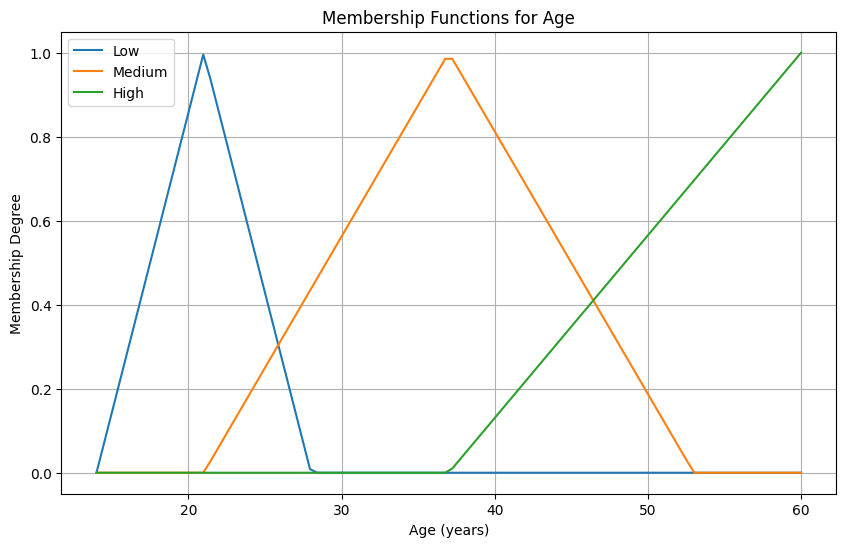

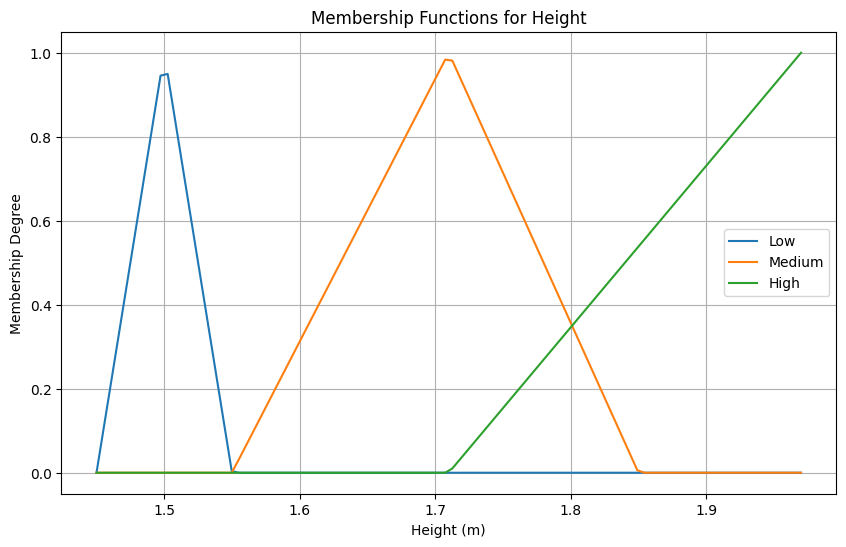

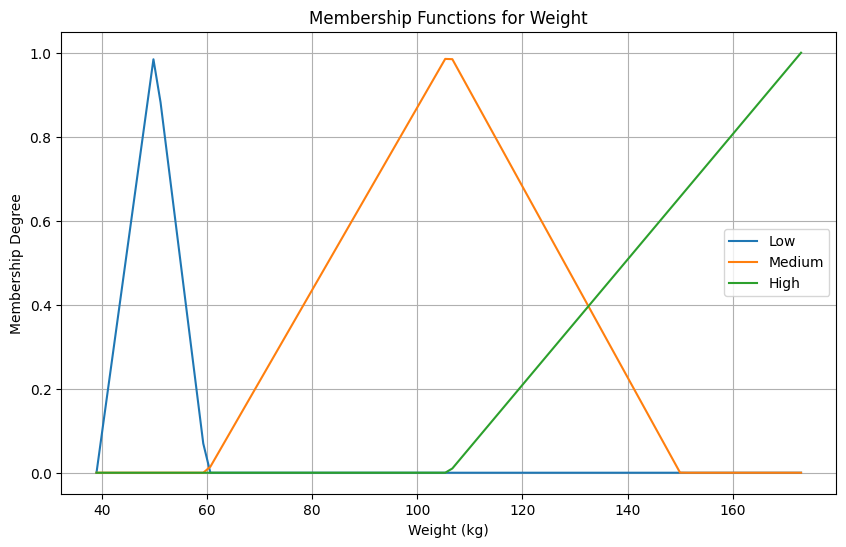

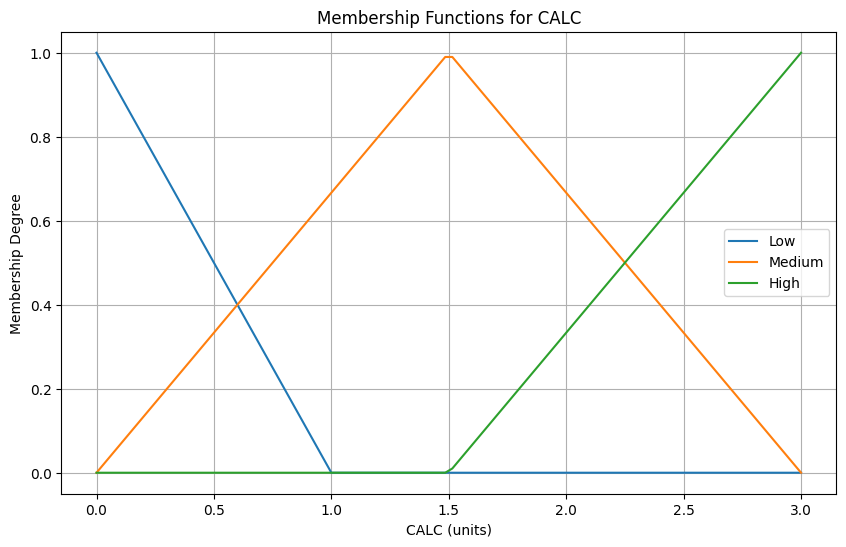

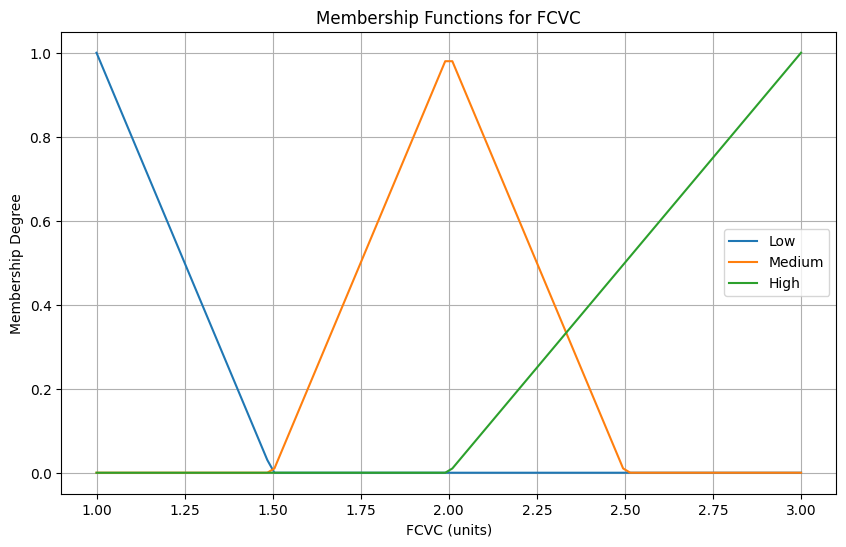

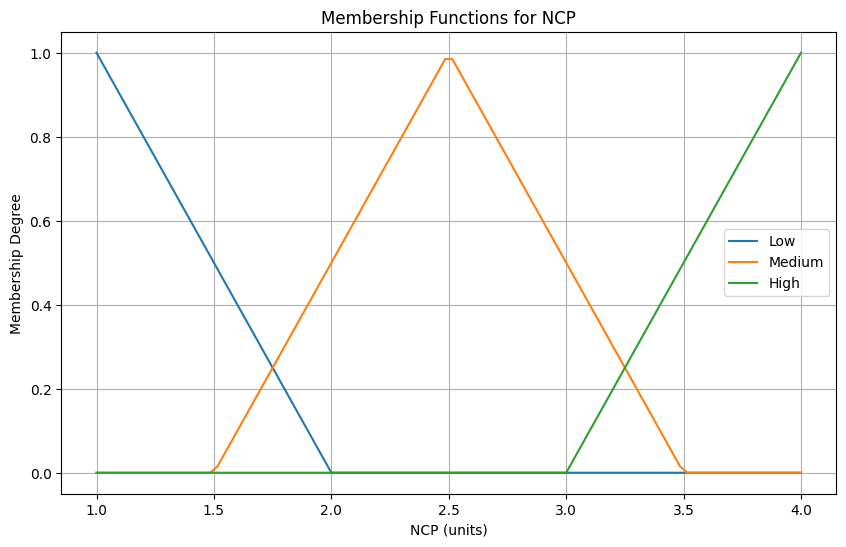

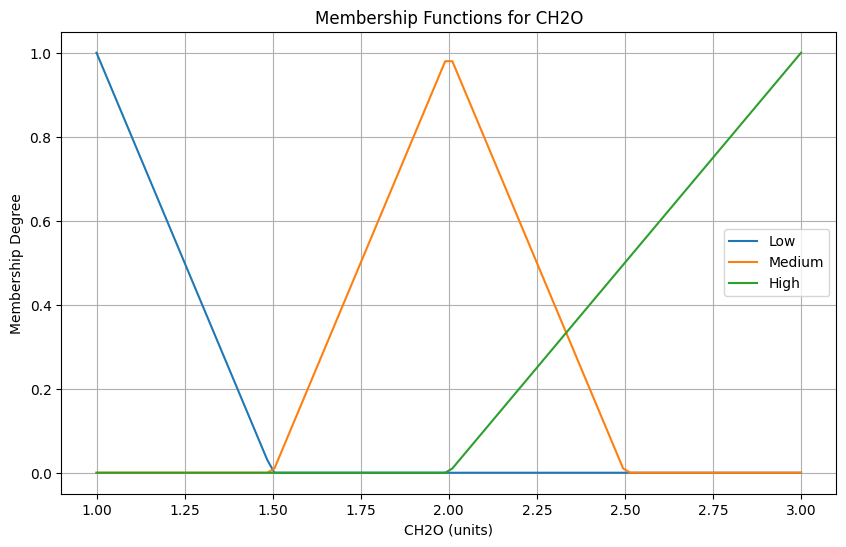

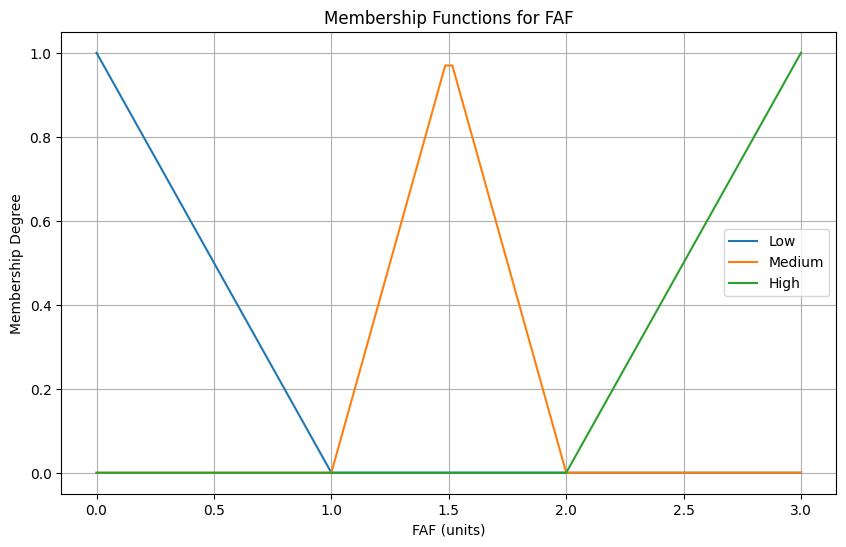

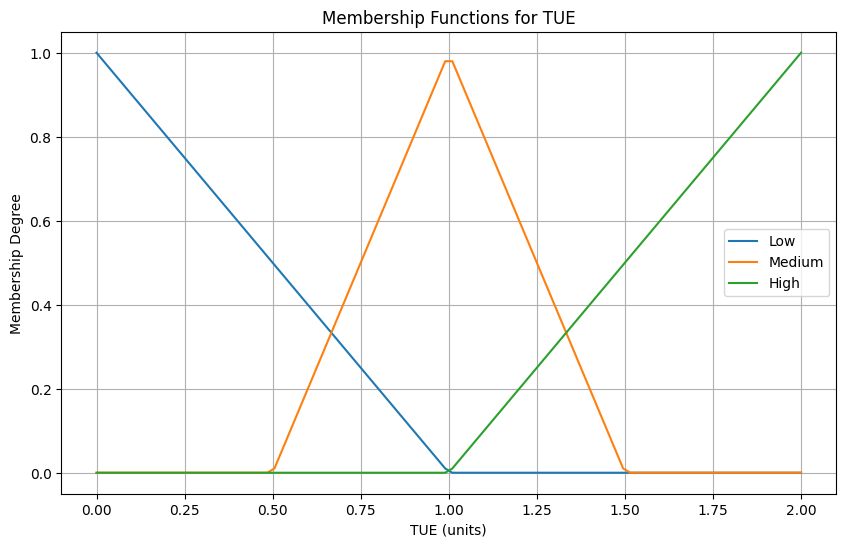

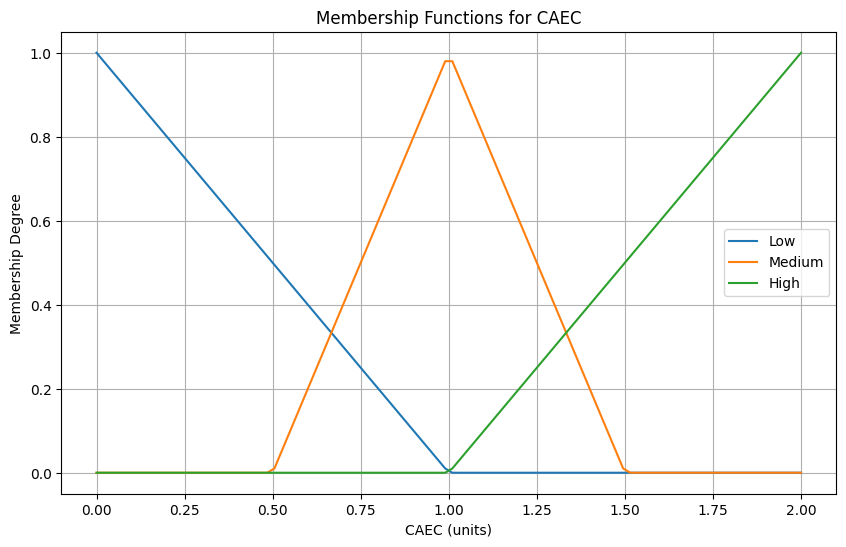

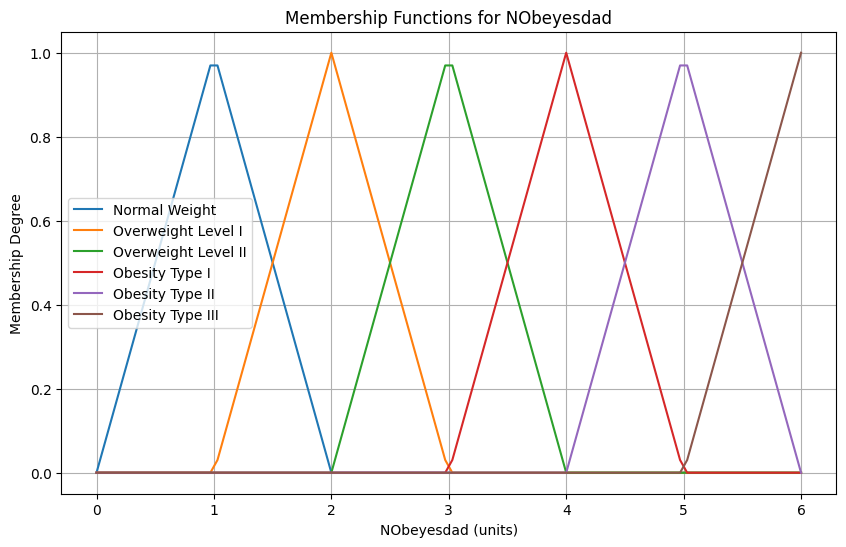

In [15]:
# Define a function to plot membership functions
def plot_membership(x, mfs, labels, title, x_label, y_label):
    plt.figure(figsize=(10, 6))
    for mf, label in zip(mfs, labels):
        plt.plot(x, mf, label=label)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting membership functions
plot_membership(Age_range, [fuzz.trimf(Age_range, [14, 21, 28]), fuzz.trimf(Age_range, [21, 37, 53]), fuzz.trimf(Age_range, [37, 60, 60])], 
                ['Low', 'Medium', 'High'], 'Membership Functions for Age', 'Age (years)', 'Membership Degree')

plot_membership(Height_range, [fuzz.trimf(Height_range, [1.45, 1.50, 1.55]), fuzz.trimf(Height_range, [1.55, 1.71, 1.85]), fuzz.trimf(Height_range, [1.71, 1.97, 1.97])], 
                ['Low', 'Medium', 'High'], 'Membership Functions for Height', 'Height (m)', 'Membership Degree')

plot_membership(Weight_range, [fuzz.trimf(Weight_range, [39, 50, 60]), fuzz.trimf(Weight_range, [60, 106, 150]), fuzz.trimf(Weight_range, [106, 173, 173])], 
                ['Low', 'Medium', 'High'], 'Membership Functions for Weight', 'Weight (kg)', 'Membership Degree')

plot_membership(CALC_range, [fuzz.trimf(CALC_range, [0, 0, 1]), fuzz.trimf(CALC_range, [0, 1.5, 3]), fuzz.trimf(CALC_range, [1.5, 3, 3])], 
                ['Low', 'Medium', 'High'], 'Membership Functions for CALC', 'CALC (units)', 'Membership Degree')

plot_membership(FCVC_range, [fuzz.trimf(FCVC_range, [1, 1, 1.5]), fuzz.trimf(FCVC_range, [1.5, 2, 2.5]), fuzz.trimf(FCVC_range, [2, 3, 3])], 
                ['Low', 'Medium', 'High'], 'Membership Functions for FCVC', 'FCVC (units)', 'Membership Degree')

plot_membership(NCP_range, [fuzz.trimf(NCP_range, [1, 1, 2]), fuzz.trimf(NCP_range, [1.5, 2.5, 3.5]), fuzz.trimf(NCP_range, [3, 4, 4])], 
                ['Low', 'Medium', 'High'], 'Membership Functions for NCP', 'NCP (units)', 'Membership Degree')

plot_membership(CH2O_range, [fuzz.trimf(CH2O_range, [1, 1, 1.5]), fuzz.trimf(CH2O_range, [1.5, 2, 2.5]), fuzz.trimf(CH2O_range, [2, 3, 3])], 
                ['Low', 'Medium', 'High'], 'Membership Functions for CH2O', 'CH2O (units)', 'Membership Degree')

plot_membership(FAF_range, [fuzz.trimf(FAF_range, [0, 0, 1]), fuzz.trimf(FAF_range, [1, 1.5, 2]), fuzz.trimf(FAF_range, [2, 3, 3])], 
                ['Low', 'Medium', 'High'], 'Membership Functions for FAF', 'FAF (units)', 'Membership Degree')

plot_membership(TUE_range, [fuzz.trimf(TUE_range, [0, 0, 1]), fuzz.trimf(TUE_range, [0.5, 1, 1.5]), fuzz.trimf(TUE_range, [1, 2, 2])], 
                ['Low', 'Medium', 'High'], 'Membership Functions for TUE', 'TUE (units)', 'Membership Degree')

plot_membership(CAEC_range, [fuzz.trimf(CAEC_range, [0, 0, 1]), fuzz.trimf(CAEC_range, [0.5, 1, 1.5]), fuzz.trimf(CAEC_range, [1, 2, 2])], 
                ['Low', 'Medium', 'High'], 'Membership Functions for CAEC', 'CAEC (units)', 'Membership Degree')

plot_membership(NObeyesdad_range, [fuzz.trimf(NObeyesdad_range, [0, 1, 2]), fuzz.trimf(NObeyesdad_range, [1, 2, 3]), fuzz.trimf(NObeyesdad_range, [2, 3, 4]),
                                   fuzz.trimf(NObeyesdad_range, [3, 4, 5]), fuzz.trimf(NObeyesdad_range, [4, 5, 6]), fuzz.trimf(NObeyesdad_range, [5, 6, 6])], 
                ['Normal Weight', 'Overweight Level I', 'Overweight Level II', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III'], 
                'Membership Functions for NObeyesdad', 'NObeyesdad (units)', 'Membership Degree')


In [11]:
# Define fuzzy rules
rules = [
    ctrl.Rule(age['low'] & height['low'] & weight['low'], nobeyesdad['normal_weight']),
    ctrl.Rule(age['medium'] & height['medium'] & weight['medium'], nobeyesdad['overweight_level_I']),
    ctrl.Rule(age['high'] & height['high'] & weight['high'], nobeyesdad['obesity_type_I']),
    ctrl.Rule(calc['high'] & fcvc['low'], nobeyesdad['obesity_type_I']),
    ctrl.Rule(ncp['high'] & ch2o['low'], nobeyesdad['obesity_type_I']),
    ctrl.Rule(faf['high'] & tue['low'], nobeyesdad['normal_weight']),
    ctrl.Rule(caec['high'] & fcvc['high'], nobeyesdad['overweight_level_I']),
    ctrl.Rule(age['high'] & faf['low'], nobeyesdad['obesity_type_II'])
]

In [12]:
# Create and simulate fuzzy control system
obesity_ctrl = ctrl.ControlSystem(rules)
obesity_sim = ctrl.ControlSystemSimulation(obesity_ctrl)

In [13]:
# Function to map numerical output to labels
def get_label(output):
    if 0 <= output < 1:
        return "normal_weight"
    elif 1 <= output < 2:
        return "overweight_level_I"
    elif 2 <= output < 3:
        return "overweight_level_II"
    elif 3 <= output < 4:
        return "obesity_type_I"
    elif 4 <= output < 5:
        return "obesity_type_II"
    else:
        return "obesity_type_III"

Numerical output: 1.9999999999999991
Label: overweight_level_I


/home/egmont/.local/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


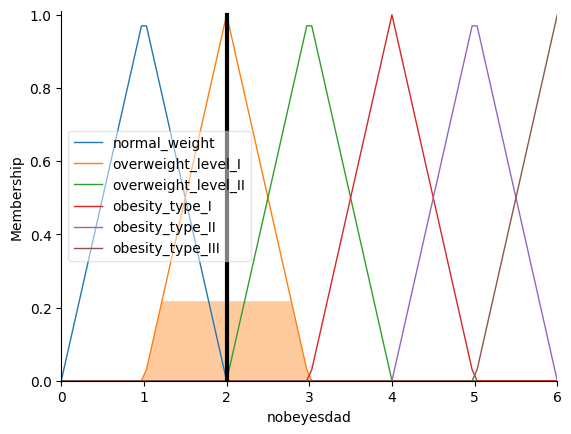

In [14]:
# Example of how to set inputs and compute
obesity_sim.input['age'] = 30
obesity_sim.input['height'] = 1.70
obesity_sim.input['weight'] = 70
obesity_sim.input['calc'] = 1
obesity_sim.input['fcvc'] = 2
obesity_sim.input['ncp'] = 3
obesity_sim.input['ch2o'] = 2
obesity_sim.input['faf'] = 1
obesity_sim.input['tue'] = 0.5
obesity_sim.input['caec'] = 1

# Perform the computation
obesity_sim.compute()

# Get numerical output
nobeyesdad_output = obesity_sim.output['nobeyesdad']

# Map numerical output to label
label = get_label(nobeyesdad_output)

# Output the result
print(f"Numerical output: {nobeyesdad_output}")
print(f"Label: {label}")

# Plot the result
nobeyesdad.view(sim=obesity_sim)
